I was going through data.gov.in when I found a data set detailing the number ofManufacturing and Service based Micro, Small & Medium Enterprises (MSMEs) by district. I thought it would be a fun visualization to see these as a heatmap and maybe try to see if there are any trends in the data set. I found the API weird so I just downloaded it as a csv (March 27th, 2020)

In [1]:
import pandas as pd
data = pd.read_excel(r"C:\Users\APOORV\AppData\Local\Temp\datafile-1.xls")
#data.sort_values(['state_id', 'DistrictName'])
data.head()


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,StateName,state_id,DistrictName,DISTRICT_ID,TotalManufacturingUnit,TotalServiceUnit,_CreatedDate
0,ANDHRA PRADESH,28,ANANTHAPUR,520,9601,8506,2020-03-26T08:35:25.493
1,ANDHRA PRADESH,28,CHITOOR,511,6689,16391,2020-03-26T08:35:25.493
2,ANDHRA PRADESH,28,EAST GODAVARI,512,11445,10167,2020-03-26T08:35:25.493
3,ANDHRA PRADESH,28,GUNTUR,509,9226,11694,2020-03-26T08:35:25.493
4,ANDHRA PRADESH,28,KRISHNA,517,8201,10480,2020-03-26T08:35:25.493


Let's try to see them by state first. I just need to aggregate the data by state and we're good to go.

In [187]:
df1 = data.groupby('StateName').agg(lambda x: x.tolist())
state = pd.DataFrame(columns=['name', 'manu', 'service'])
df1.head()
nam = []
man = []
ser = []
for i, j in df1.iterrows():
    mansum = 0
    servsum = 0
    for k in j[3]:
        mansum+=k
    for k in j[4]:
        servsum +=k
    state = state.append({'name': i, 'manu': mansum, 'service': servsum}, ignore_index=True)
    nam.append(i)
    man.append(mansum)
    ser.append(servsum)
state.head()


,state_id,DistrictName,DISTRICT_ID,TotalManufacturingUnit,TotalServiceUnit,_CreatedDate
count,37,37,37,37,37,37
unique,37,37,37,37,37,37
top,"[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]","[EAST GARO HILLS, EAST JAINTIA HILLS, EAST KHA...","[301, 640, 305, 641, 304, 302, 642, 643, 300, ...","[59, 17, 489, 106, 135, 12, 42, 31, 130, 307, ...","[14, 19, 392, 34, 68, 4, 10, 32, 52, 24, 46]","[2020-03-26T08:37:12.350, 2020-03-26T08:37:12...."
freq,1,1,1,1,1,1


Let's plot these out on a simple bar graph

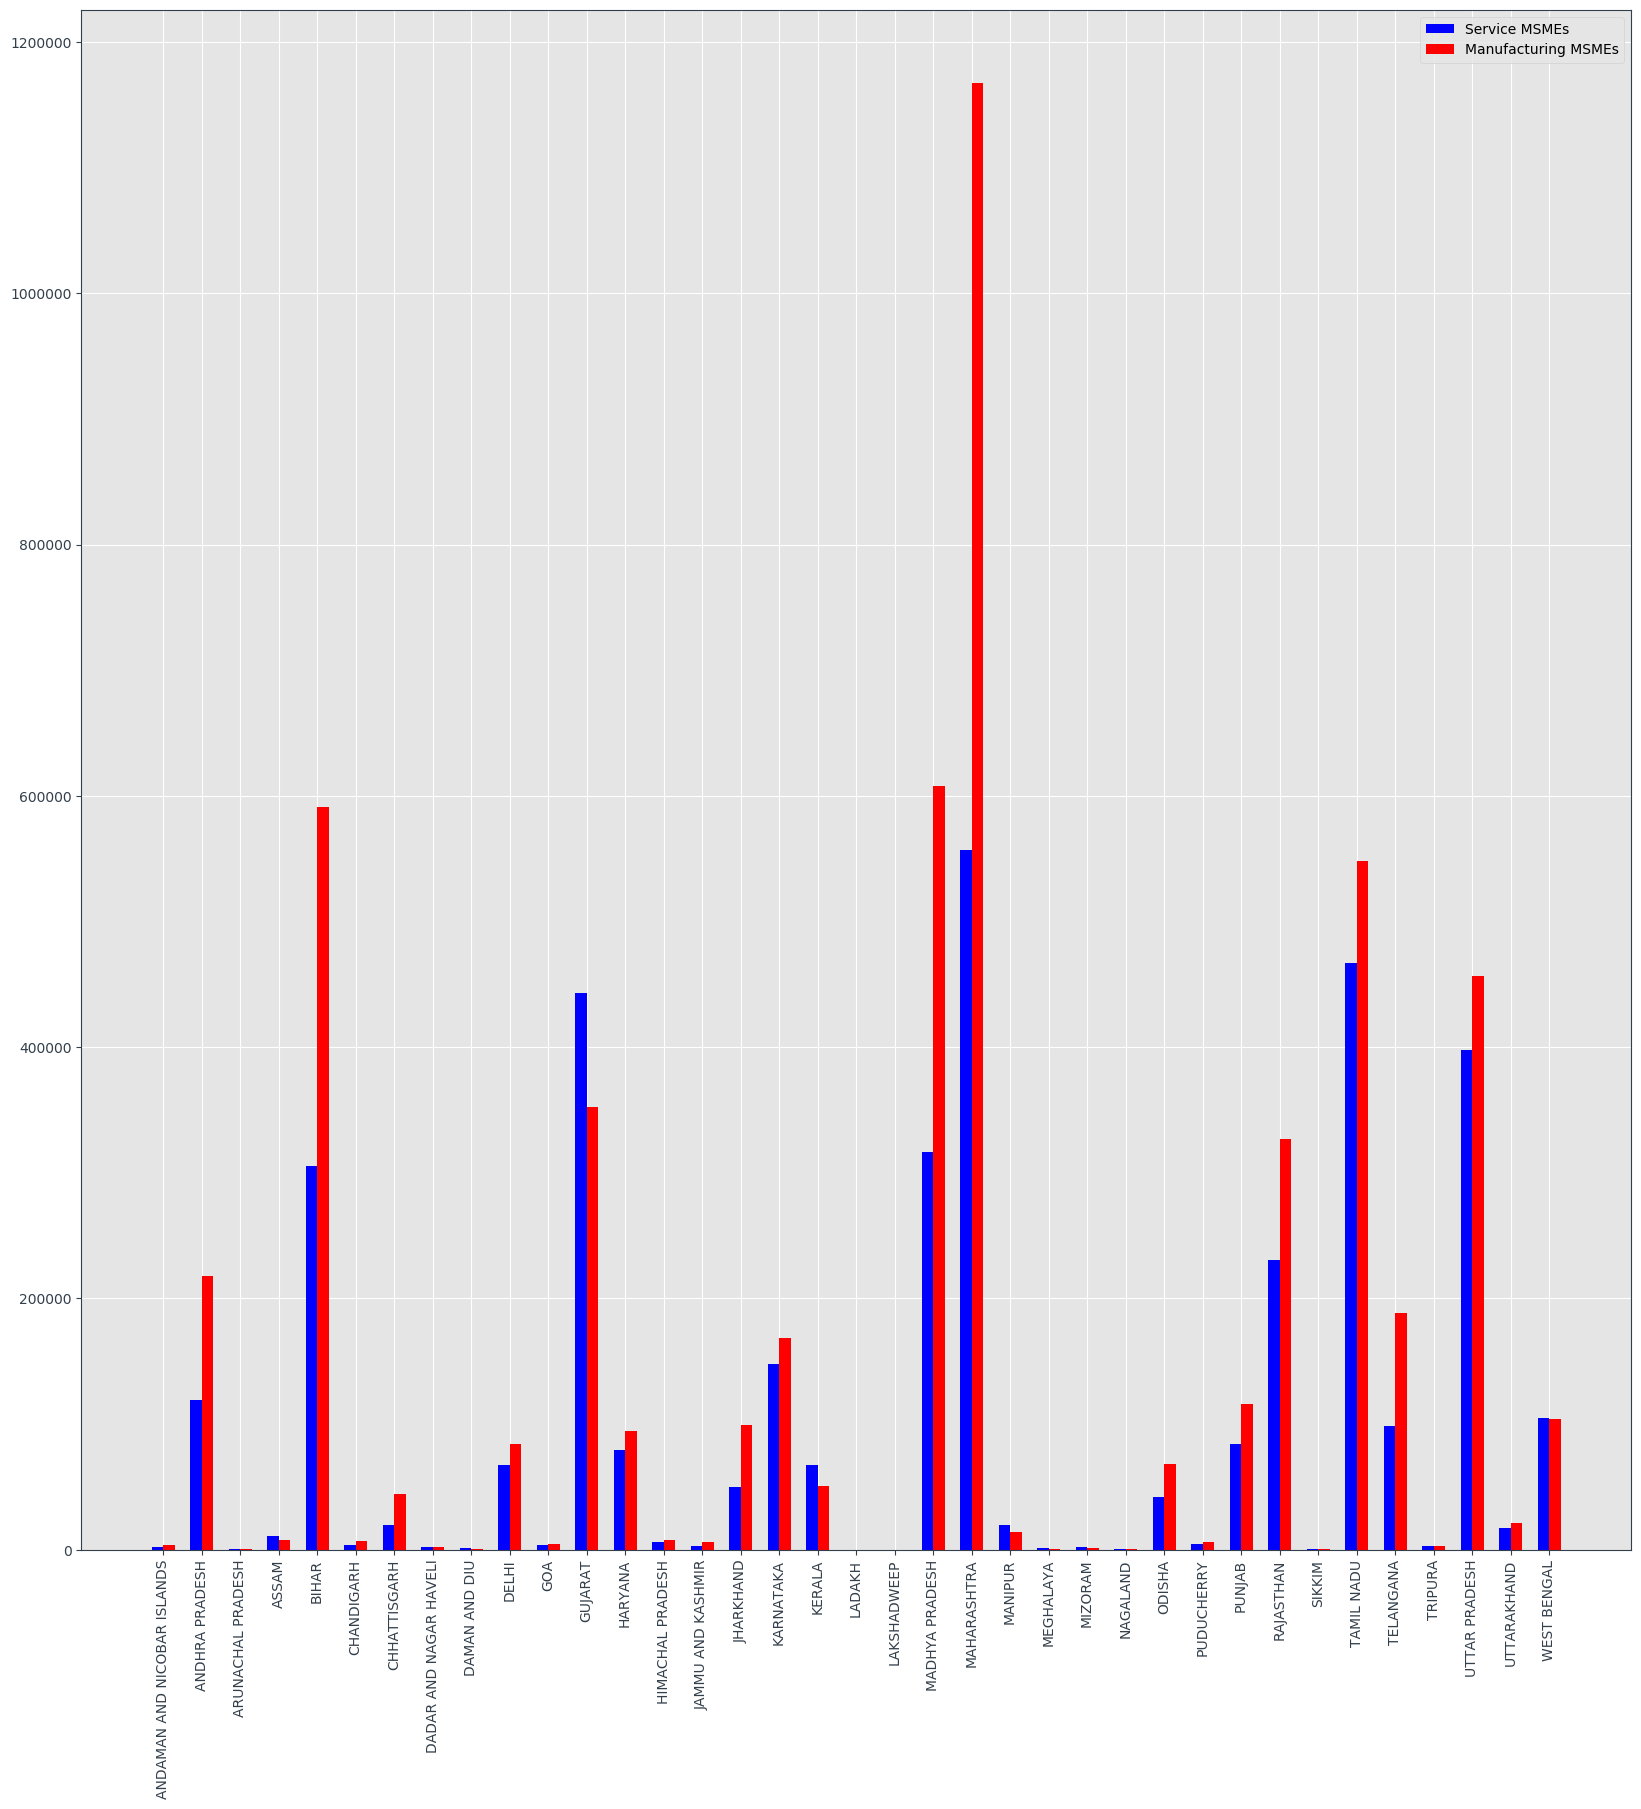

In [165]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

w = .3
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
x = np.arange(len(nam))

plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.figure(figsize = (20, 20), facecolor = None) 
manuf = plt.bar(x, man, color = 'b', align = 'center', width = w)
serv = plt.bar(x+w, ser, color = 'r', align = 'center', width = w)
plt.xticks(x + w /2, nam, rotation='vertical')
plt.legend([manuf, serv], ['Service MSMEs', 'Manufacturing MSMEs'])
plt.show()



Maharashtra has a huge amount of MSMEs as compared to the rest of the country. Especially in the manufacturing sector. I wonder if there's a specific reason for this. Maybe I'll try to find funding details by state and see if there's a correlation later. Onto the heatmap for now.

I got the shapefile for India from gadm.org


In [22]:
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

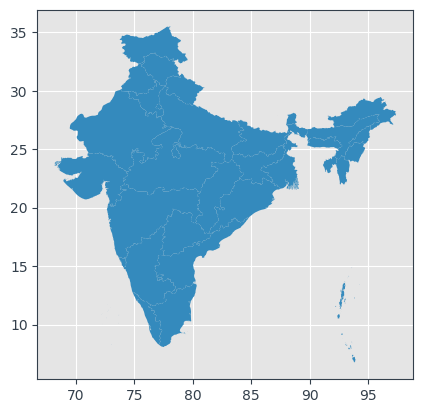

In [194]:
shp_path = r"C:\Users\APOORV\Downloads\gadm36_IND_shp\gadm36_IND_1.shp"
list = r"C:\Users\APOORV\Downloads\State long lat - Sheet1(2).csv"
import geopandas as gpd
pts = gpd.GeoDataFrame.from_file(shp_path)
pts.plot()

Waiting around is a pain so I'll add a loading bar to see the progress

In [ ]:
import geopy as gp
lats = []
longs = []
locator = gp.Nominatim(user_agent="apoorv")
from geopy.extra.rate_limiter import RateLimiter
r = []
for i, j in data.iterrows():
    k = j[2] + "," + j[0]
    r.append(k)
data['loc'] = r
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
from tqdm import tqdm
tqdm.pandas()
data['location'] = data['loc'].progress_apply(geocode)
data['location'] = data['loc'].apply(geocode)

data['point'] = data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
data[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)

In [134]:
data.head()

,StateName,state_id,DistrictName,DISTRICT_ID,TotalManufacturingUnit,TotalServiceUnit,_CreatedDate,loc,location,point,latitude,longitude,altitude,total
0,ANDHRA PRADESH,28,ANANTHAPUR,520,9601,8506,2020-03-26T08:35:25.493,"ANANTHAPUR,ANDHRA PRADESH","(Ananthapur-Dharmavaram Road, Pesaragunta, Rap...","(14.5406722, 77.6619216, 0.0)",14.540672,77.661922,0.0,18107
1,ANDHRA PRADESH,28,CHITOOR,511,6689,16391,2020-03-26T08:35:25.493,"CHITOOR,ANDHRA PRADESH","(Chitoor Math, West Mada Street, Srivari Templ...","(13.6860791, 79.3451226, 0.0)",13.686079,79.345123,0.0,23080
2,ANDHRA PRADESH,28,EAST GODAVARI,512,11445,10167,2020-03-26T08:35:25.493,"EAST GODAVARI,ANDHRA PRADESH","(East Godavari, Andhra Pradesh, India, (17.233...","(17.233496, 81.7225986, 0.0)",17.233496,81.722599,0.0,21612
3,ANDHRA PRADESH,28,GUNTUR,509,9226,11694,2020-03-26T08:35:25.493,"GUNTUR,ANDHRA PRADESH","(Guntur, Andhra Pradesh, 522001, India, (16.29...","(16.2915189, 80.4541588, 0.0)",16.291519,80.454159,0.0,20920
4,ANDHRA PRADESH,28,KRISHNA,517,8201,10480,2020-03-26T08:35:25.493,"KRISHNA,ANDHRA PRADESH","(Krishna, Andhra Pradesh, India, (16.6691525, ...","(16.6691525, 80.7190024, 0.0)",16.669152,80.719002,0.0,18681


Gotta manually fix the NaN values

In [ ]:
rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]

In [127]:
data.at[698, 'latitude'] = 10.5667
data.at[698, 'longitude'] = 72.6417
data.at[45, ['latitude', 'longitude', 'altitude']] = [26.183333, 91.733333, 0]
data.at[46, ['latitude', 'longitude', 'altitude']] = [26.183333, 93.566667, 0]
data.at[96, ['latitude', 'longitude', 'altitude']] = [21.67, 82.17, 0]
data.at[118, ['latitude', 'longitude', 'altitude']] = [21.1, 81.03, 0]
data.at[127, ['latitude', 'longitude', 'altitude']] = [24.0283, 73.0414, 0]
data.at[132, ['latitude', 'longitude', 'altitude']] = [22.305556, 74.013889, 0]
data.at[134, ['latitude', 'longitude', 'altitude']] = [22.2, 69.65, 0]
data.at[135, ['latitude', 'longitude', 'altitude']] = [22.833889, 74.257778, 0]
data.at[224, ['latitude', 'longitude', 'altitude']] = [12.87, 74.88, 0]
data.at[241, ['latitude', 'longitude', 'altitude']] = [14.6, 74.7, 0]
data.at[254, ['latitude', 'longitude', 'altitude']] = [9.27, 76.78, 0]
data.at[328, ['latitude', 'longitude', 'altitude']] = [219.16, 77.32, 0]
data.at[374, ['latitude', 'longitude', 'altitude']] = [25.9, 94.783333, 0]
data.at[420, ['latitude', 'longitude', 'altitude']] = [30.94, 74.62, 0]
data.at[433, ['latitude', 'longitude', 'altitude']] = [31.125278, 76.116389, 0]
data.at[493, ['latitude', 'longitude', 'altitude']] = [11.4916, 76.7337, 0]

data.at[515, ['latitude', 'longitude', 'altitude']] = [19.3619, 79.2930, 0]
data.at[527, ['latitude', 'longitude', 'altitude']] = [17.3891, 77.8367, 0]
data.at[547, ['latitude', 'longitude', 'altitude']] = [26.4684, 82.6915, 0]
data.at[610, ['latitude', 'longitude', 'altitude']] = [26.7672, 83.0361, 0]
data.at[614, ['latitude', 'longitude', 'altitude']] = [27.2991, 83.0928, 0]
data.at[629, ['latitude', 'longitude', 'altitude']] = [30.2844, 78.9811, 0]
data.at[636, ['latitude', 'longitude', 'altitude']] = [26.3452, 89.4482, 0]
data.at[645, ['latitude', 'longitude', 'altitude']] = [22.5726, 88.3639, 0]
data.at[649, ['latitude', 'longitude', 'altitude']] = [22.6168, 88.4029, 0]
data.at[653, ['latitude', 'longitude', 'altitude']] = [22.1352, 88.4016, 0]
data.at[656, ['latitude', 'longitude', 'altitude']] = [7.1205, 93.7842, 0]
data.at[658, ['latitude', 'longitude', 'altitude']] = [11.7401, 92.6586, 0]
data.at[660, ['latitude', 'longitude', 'altitude']] = [20.1809, 73.0169, 0]





Let's make a heatmap! We'll do the Manufacturing one first.

In [135]:
import folium
from folium.plugins import HeatMap



max_amount = float(data['TotalServiceUnit'].max())

hmap = folium.Map(location=[22, 72.5], zoom_start=3, ) 

hm_wide = HeatMap(data[['latitude','longitude','TotalServiceUnit']].values,
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)
hmap.save('Service_HeatMap.html')

In [132]:

max_amount = float(data['TotalManufacturingUnit'].max())

hmap = folium.Map(location=[22, 72.5], zoom_start=3, ) 

hm_wide = HeatMap(data[['latitude','longitude','TotalManufacturingUnit']].values,
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)
hmap.save('Manufacturing_HeatMap.html')

Let's make one for the total too now that we're at it.

In [133]:
data['total'] = data['TotalServiceUnit'] + data['TotalManufacturingUnit']
max_amount = float(data['total'].max())

hmap = folium.Map(location=[22, 72.5], zoom_start=3, ) 

hm_wide = HeatMap(data[['latitude','longitude','total']].values,
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_wide)
hmap.save('Total_HeatMap.html')